Корреляция по Пирсону: -0.9999999999999998


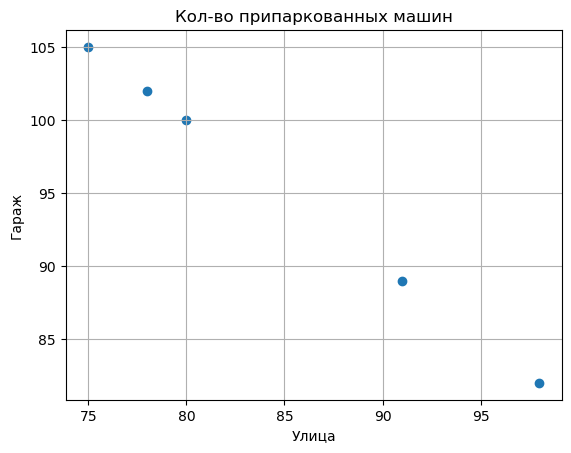

In [1]:
import numpy as np
import matplotlib.pyplot as plt

street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

correlation_matrix = np.corrcoef(street, garage)
pearson_coefficient = correlation_matrix[0, 1]
print("Корреляция по Пирсону:", pearson_coefficient)

plt.scatter(street, garage)
plt.grid(True)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.title("Кол-во припаркованных машин")
plt.show()

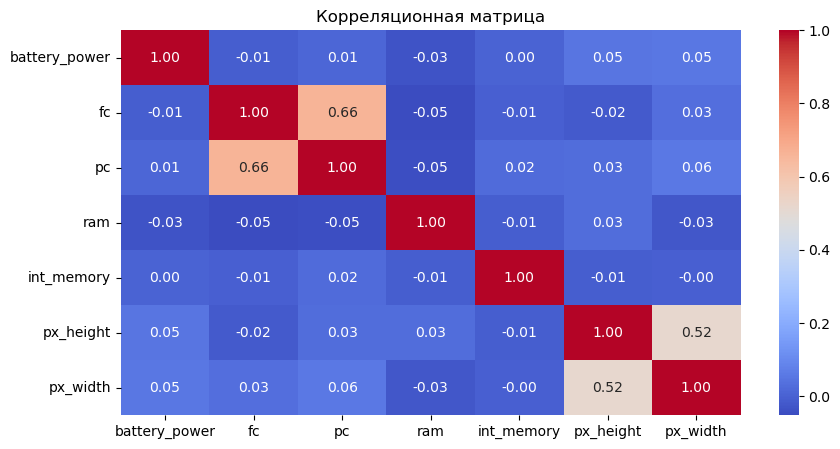

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('test.csv')
features = ['battery_power', 'fc', 'pc', 'ram', 'int_memory', 'px_height', 'px_width']

selected_features = data[features]

correlation_matrix = selected_features.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()


Наклон: 0.4828210449985779
Сдвиг: -0.2612827864157028
MSE: 11.249691316733474


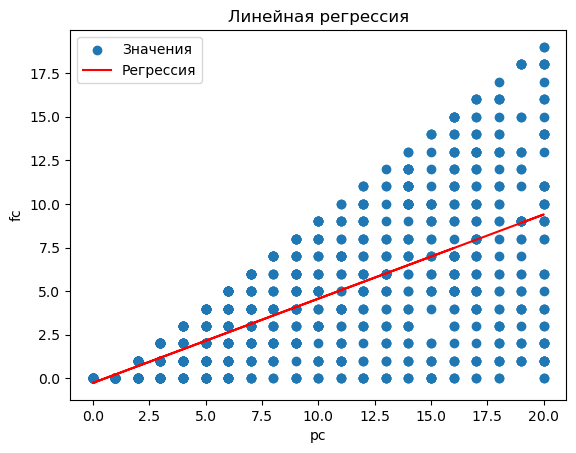

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

def perform_linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    predicted_y = slope * x + intercept
    mse = np.mean((predicted_y - y)**2)
    return slope, intercept, mse, predicted_y

def plot_regression(x, y, predicted_y, xlabel, ylabel, title):
    plt.scatter(x, y, label='Значения')
    plt.plot(x, predicted_y, color='red', label='Регрессия')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

data = pd.read_csv('test.csv')

x_var = 'pc'
y_var = 'fc'

slope, intercept, mse, predicted_y = perform_linear_regression(data[x_var], data[y_var])

# Вывод результатов
print('Наклон:', slope)
print('Сдвиг:', intercept)
print('MSE:', mse)

plot_regression(data[x_var], data[y_var], predicted_y, xlabel=x_var, ylabel=y_var, title='Линейная регрессия')


In [74]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('insurance.csv')

# Предобработка данных
# (здесь может потребоваться обработка пропущенных значений, конвертация типов и т.д.)

# Вывод списка уникальных регионов
unique_regions = data['region'].unique()
print('Уникальные регионы:', unique_regions)

Уникальные регионы: ['southwest' 'southeast' 'northwest' 'northeast']


In [91]:
# 3.1 Однофакторный ANOVA тест с использованием Scipy
anova_result_scipy = f_oneway(*[data['bmi'][data['region'] == region] for region in data['region'].unique()])

print('\n3.1 Результаты ANOVA теста (Scipy):')
print(anova_result_scipy)



3.1 Результаты ANOVA теста (Scipy):
F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)


In [89]:
# 3.2 Однофакторный ANOVA тест с использованием Statsmodels
model = ols('bmi ~ region', data=data).fit()
anova_result_statsmodels = sm.stats.anova_lm(model, typу=2)

print('\n3.2 Результаты ANOVA теста (Statsmodels):')
print(anova_result_statsmodels)



3.2 Результаты ANOVA теста (Statsmodels):
              df        sum_sq      mean_sq          F        PR(>F)
region       3.0   4055.880631  1351.960210  39.495057  1.881839e-24
Residual  1334.0  45664.319755    34.231124        NaN           NaN


In [95]:
import itertools
from scipy.stats import ttest_ind

regions = df['region'].unique()

region_combinations = list(itertools.combinations(regions, 2))

for region1, region2 in region_combinations:
    group1 = df.loc[df['region'] == region1, 'bmi']
    group2 = df.loc[df['region'] == region2, 'bmi']
    
    t_stat, p_value = ttest_ind(group1, group2)
    print(f'Значения для {region1, region2} t_stat: {t_stat}, p_value: {p_value}')

alpha = 0.05
bonferroni_correction = alpha / len(region_combinations)
print(f'Поправка Бонферрони: {bonferroni_correction}')


Значения для ('southwest', 'southeast') t_stat: -5.908373821545118, p_value: 5.4374009639680636e-09
Значения для ('southwest', 'northwest') t_stat: 3.2844171500398582, p_value: 0.001076958496307695
Значения для ('southwest', 'northeast') t_stat: 3.1169000930045923, p_value: 0.0019086161671573072
Значения для ('southeast', 'northwest') t_stat: 9.25649013552548, p_value: 2.643571405230106e-19
Значения для ('southeast', 'northeast') t_stat: 8.790905562598699, p_value: 1.186014937424813e-17
Значения для ('northwest', 'northeast') t_stat: 0.060307727183293185, p_value: 0.951929170821864
Поправка Бонферрони: 0.008333333333333333



3.4 Результаты пост-хок теста Тьюки:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


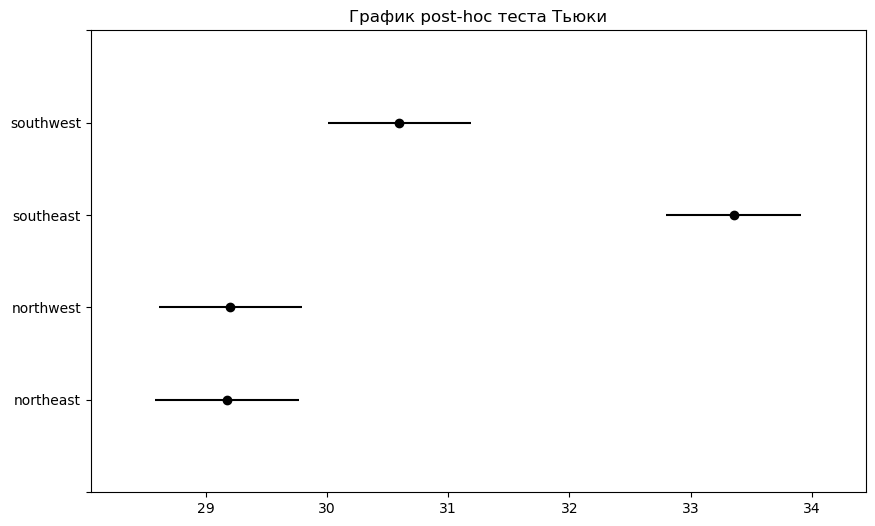

In [112]:
# 3.4 Пост-хок тест Тьюки
posthoc_tukey = pairwise_tukeyhsd(data['bmi'], data['region'])
print('\n3.4 Результаты пост-хок теста Тьюки:')
print(posthoc_tukey)

fig = posthoc_tukey.plot_simultaneous()
plt.title('График post-hoc теста Тьюки')
plt.show()


In [117]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'bmi ~ region * sex'
model = ols(formula, data).fit()
anova_result_2way = anova_lm(model)

print('\n3.5 Результаты двухфакторного ANOVA теста:')
print(anova_result_2way)



3.5 Результаты двухфакторного ANOVA теста:
                df        sum_sq      mean_sq          F        PR(>F)
region         3.0   4055.880631  1351.960210  39.602259  1.636858e-24
sex            1.0     86.007035    86.007035   2.519359  1.126940e-01
region:sex     3.0    174.157808    58.052603   1.700504  1.650655e-01
Residual    1330.0  45404.154911    34.138462        NaN           NaN


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
northeastfemale   northeastmale  -0.2998 0.9998 -2.2706  1.6711  False
northeastfemale northwestfemale  -0.0464    1.0 -2.0142  1.9215  False
northeastfemale   northwestmale  -0.2042    1.0 -2.1811  1.7728  False
northeastfemale southeastfemale   3.3469    0.0    1.41  5.2839   True
northeastfemale   southeastmale   4.6657    0.0  2.7634   6.568   True
northeastfemale southwestfemale   0.7362 0.9497 -1.2377    2.71  False
northeastfemale   southwestmale   1.8051 0.1007 -0.1657   3.776  False
  northeastmale northwestfemale   0.2534 0.9999 -1.7083  2.2152  False
  northeastmale   northwestmale   0.0956    1.0 -1.8752  2.0665  False
  northeastmale southeastfemale   3.6467    0.0  1.7159  5.5775   True
  northeastmale   southeastmale   4.9655    0.0  3.0695  6.8614   True
  nort

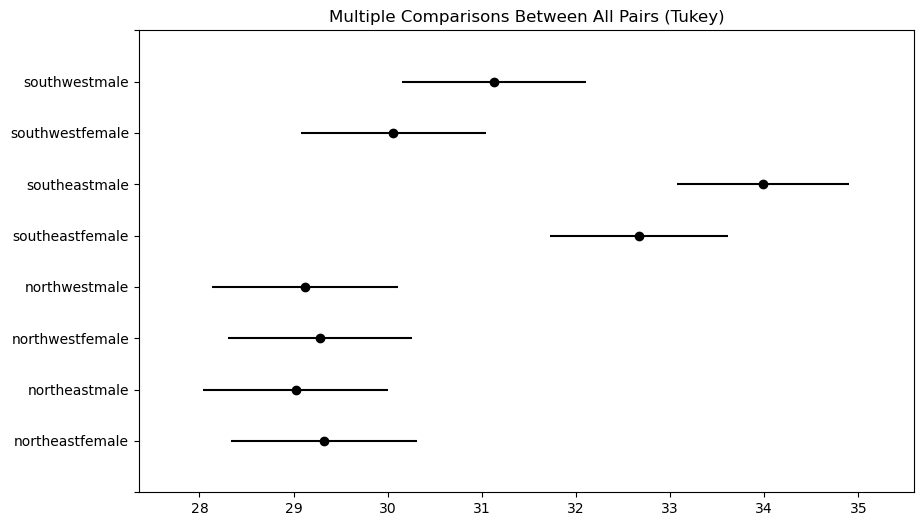

In [119]:
tukey_results = pairwise_tukeyhsd(df['bmi'], df['region'] + df['sex'])
tukey_results.plot_simultaneous()
print(tukey_results)